In [11]:
from create_fluxes_sbml import *
import sys
from load_sbml_model import *
sys.path.insert(1,"../../functions/kinetic_mechanisms/")
import KineticMechanisms
import torch
from torch import nn
import torchdiffeq
import matplotlib.pyplot as plt

model_name="../../models/SBML_models/BIOMD0000000458_url.xml"
# data_name="../data/rawdata_simple_sbml.csv"
model=load_sbml_model(model_name)
initial_concentration_dict=get_initial_conditions(model)
parameters,boundaries,compartments=get_model_parameters(model)


Number of internal inconsistencies 0
Number of species: 7
Number of reactions: 3
Number of constant boundary metabolites 5


In [12]:
fluxes=create_fluxes(parameters,boundaries,compartments,model)
fluxes



{'PDH': torch_SBML_rate_law(
   (local_parameters): ParameterDict(
       (KAp3g): Parameter containing: [torch.FloatTensor of size 1]
       (KAphp): Parameter containing: [torch.FloatTensor of size 1]
       (KiAser): Parameter containing: [torch.FloatTensor of size 1]
       (kcatA): Parameter containing: [torch.FloatTensor of size 1]
   )
 ),
 'PSA': torch_SBML_rate_law(
   (local_parameters): ParameterDict(
       (KCphp): Parameter containing: [torch.FloatTensor of size 1]
       (KCpser): Parameter containing: [torch.FloatTensor of size 1]
       (kcatC): Parameter containing: [torch.FloatTensor of size 1]
   )
 ),
 'PSP': torch_SBML_rate_law(
   (local_parameters): ParameterDict(
       (KBpser): Parameter containing: [torch.FloatTensor of size 1]
       (KBser): Parameter containing: [torch.FloatTensor of size 1]
       (kcatB): Parameter containing: [torch.FloatTensor of size 1]
   )
 )}

In [13]:
len(list(sbml_model.named_parameters()))

10

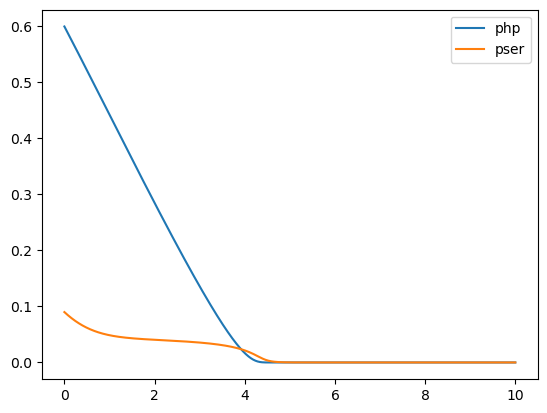

In [14]:


sbml_model=torch_SBML_kinetic_model(model,fluxes=fluxes)

time_points=np.linspace(0,10,1000)
tensor_timepoints=torch.tensor(time_points,dtype=torch.float64,requires_grad=False)
initial_values=torch.Tensor(list(initial_concentration_dict.values()))

predicted_c =torchdiffeq.odeint_adjoint(func=sbml_model, y0=initial_values, t=tensor_timepoints,method="cvode",rtol=1e-4,atol=1e-6)

# print(initial_values)
# plt.title("Parameter perturbation")
for i in range(len(initial_values)):
    plt.plot(time_points,predicted_c.detach().numpy()[:,i],label=list(initial_concentration_dict.keys())[i])
# plt.yscale("log")
plt.legend()
plt.show()